# Alzheimer's Prediction 
### Omar Farooq
## Data Description

In [1]:
# Libraries
import pandas as pd
import numpy as np
import missingno as mno
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# Load training data
data = pd.read_csv('oasis_cross-sectional.csv')
data.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


#### COLUMN DESCRIPTORS

| COL | FULL-FORMS |
| --- | --- | 
| EDUC | Years of education |
| SES | Socioeconomic Status |
| MMSE | Mini Mental State Examination |
| CDR | Clinical Dementia Rating |
| eTIV | Estimated Total Intracranial Volume |
| nWBV	| Normalize Whole Brain Volume |
| ASF | Atlas Scaling Factor |


In [3]:
data.shape

(436, 12)

In [4]:
data.describe()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
count,436.000000,235.000000,216.000000,235.00000,235.000000,436.000000,436.000000,436.000000,20.00000
mean,51.357798,3.178723,2.490741,27.06383,0.285106,1481.919725,0.791670,1.198894,20.55000
std,25.269862,1.311510,1.120593,3.69687,0.383405,158.740866,0.059937,0.128682,23.86249
min,18.000000,1.000000,1.000000,14.00000,0.000000,1123.000000,0.644000,0.881000,1.00000
25%,23.000000,2.000000,2.000000,26.00000,0.000000,1367.750000,0.742750,1.111750,2.75000
50%,54.000000,3.000000,2.000000,29.00000,0.000000,1475.500000,0.809000,1.190000,11.00000
75%,74.000000,4.000000,3.000000,30.00000,0.500000,1579.250000,0.842000,1.284250,30.75000
max,96.000000,5.000000,5.000000,30.00000,2.000000,1992.000000,0.893000,1.563000,89.00000


In [5]:
data.dtypes

ID        object
M/F       object
Hand      object
Age        int64
Educ     float64
SES      float64
MMSE     float64
CDR      float64
eTIV       int64
nWBV     float64
ASF      float64
Delay    float64
dtype: object

# Data Wrangling

In [6]:
data.isnull().sum()

ID         0
M/F        0
Hand       0
Age        0
Educ     201
SES      220
MMSE     201
CDR      201
eTIV       0
nWBV       0
ASF        0
Delay    416
dtype: int64

In [7]:
data.columns

Index(['ID', 'M/F', 'Hand', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV',
       'nWBV', 'ASF', 'Delay'],
      dtype='object')

In [9]:
data = data.drop(columns=['ID', 'Delay'])

In [10]:
col_list = [c for c in data.columns if data[c].dtype == 'object']
col_list

['M/F', 'Hand']

In [11]:
# Make a copy of data
train_data = data.copy()

# Change data types of columns
for c in col_list:
    train_data[c] = train_data[c].astype('category')
    train_data[c] = train_data[c].cat.codes

In [12]:
# Compare Actual and Encoded labels
for c in col_list:
    print('column:', c)
    print(data[c].unique().tolist())
    print(train_data[c].unique().tolist(), '\n')


column: M/F
['F', 'M']
[0, 1] 

column: Hand
['R']
[0] 



In [13]:
data.head()

,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105
4,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010


In [14]:
train_data.head()

,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,74,2.0,3.0,29.0,0.0,1344,0.743,1.306
1,0,0,55,4.0,1.0,29.0,0.0,1147,0.810,1.531
2,0,0,73,4.0,3.0,27.0,0.5,1454,0.708,1.207
3,1,0,28,NaN,NaN,NaN,NaN,1588,0.803,1.105
4,1,0,18,NaN,NaN,NaN,NaN,1737,0.848,1.010


In [16]:
cols = train_data.columns

#### COLUMN DESCRIPTORS

| COL | FULL-FORMS |
| --- | --- | 
| EDUC | Years of education |
| SES | Socioeconomic Status |
| MMSE | Mini Mental State Examination |
| CDR | Clinical Dementia Rating |
| eTIV | Estimated Total Intracranial Volume |
| nWBV	| Normalize Whole Brain Volume |
| ASF | Atlas Scaling Factor |

### Mini-Mental State Examination

The MMSE is a written test that can provide a method of monitoring deterioration over time. I however has poor sensitivity at detected mild/early dementia

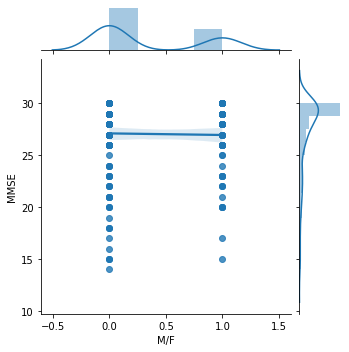

C:\Users\omarf\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


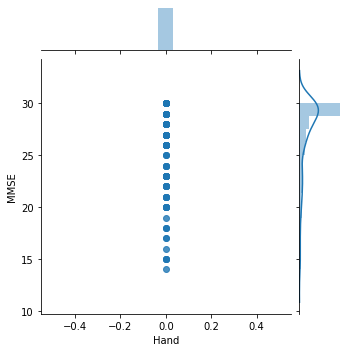

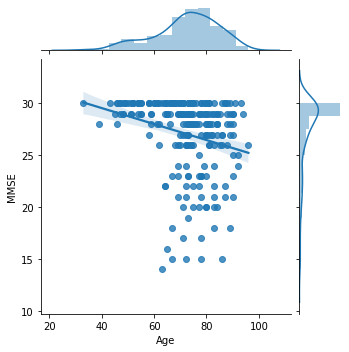

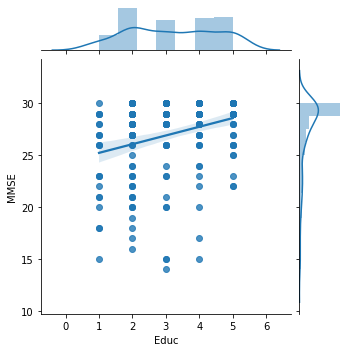

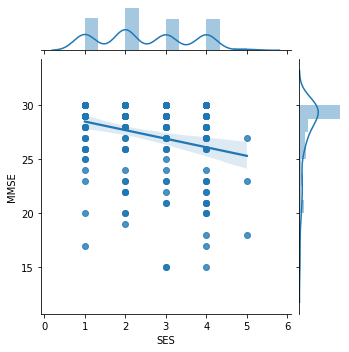

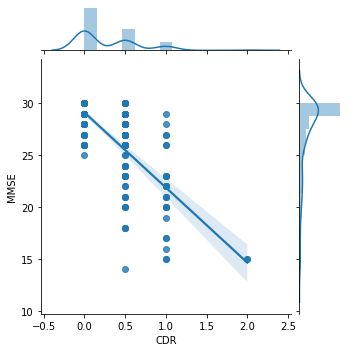

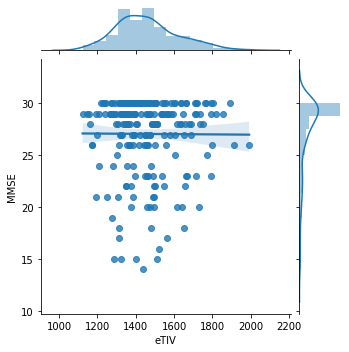

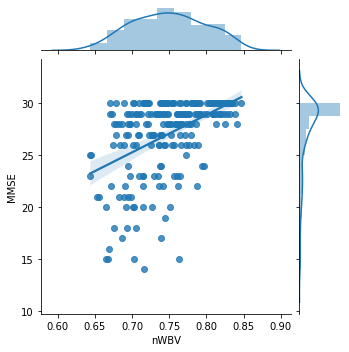

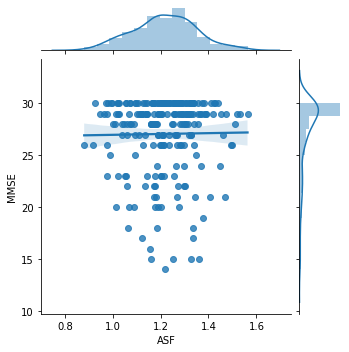

In [17]:
for c in cols:
    if(c != "MMSE"):
        sns.jointplot(x=c, y="MMSE", data=train_data, kind = 'reg', height =5)
        plt.show()

MMSE scores :
-detoriate with age
-increase with education levels
-detoriate with socio economic status
-are strongly negatively correlated with clanical dementia rating
-increase with brain volumes

We see that MMSE scores are -vely skewed

In [7]:
from sklearn import linear_model
# Regression to impute missing values in MMSE

X = train_data.loc[train_data['MMSE'].notnull(), ['Age','eTIV','nWBV','ASF']]
y = train_data.loc[train_data['MMSE'].notnull(), 'MMSE']
#X = X.drop(columns=['MMSE'])
print(X.shape, y.shape)

NameError: name 'train_data' is not defined

In [17]:
data.isnull().sum()

M/F       0
Hand      0
Age       0
Educ    201
SES     220
MMSE    201
CDR     201
eTIV      0
nWBV      0
ASF       0
dtype: int64

In [18]:
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
X_miss = train_data.loc[train_data['MMSE'].isnull(), ['Age', 'MMSE', 'eTIV','nWBV','ASF']]
X_miss = X_miss.drop(columns = ['MMSE'])

print(X_miss.shape)


(201, 4)


In [20]:
train_data.loc[train_data['MMSE'].isnull(), 'MMSE'] = model.predict(X_miss)

In [21]:
train_data.isnull().sum()

M/F       0
Hand      0
Age       0
Educ    201
SES     220
MMSE      0
CDR     201
eTIV      0
nWBV      0
ASF       0
dtype: int64

### Clinical Dementia Rating
The CDR is a 5-point scale used to characterize six domains of cognitive and functional performance applicable to Alzheimer disease and related dementias: Memory, Orientation, Judgment & Problem Solving, Community Affairs, Home & Hobbies, and Personal Care.

In [22]:
for c in cols:
    if(c != "CDR"):
        sns.jointplot(x=c, y="CDR", data=train_data, kind = 'reg', height =5)
        plt.show()

NameError: name 'cols' is not defined

In [23]:
train_data.isnull().sum()

M/F       0
Hand      0
Age       0
Educ    201
SES     220
MMSE      0
CDR     201
eTIV      0
nWBV      0
ASF       0
dtype: int64

In [24]:
# Regression to impute missing values in CDR

X = train_data.loc[train_data['CDR'].notnull(), ['Age','eTIV','nWBV','ASF']]
y = train_data.loc[train_data['CDR'].notnull(), 'CDR']
#X = X.drop(columns=['CDR'])
print(X.shape, y.shape)

(235, 4) (235,)


In [25]:
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
X_miss = train_data.loc[train_data['CDR'].isnull(), ['Age', 'CDR', 'eTIV','nWBV','ASF']]
X_miss = X_miss.drop(columns = ['CDR'])

print(X_miss.shape)

(201, 4)


In [27]:
train_data.loc[train_data['CDR'].isnull(), 'CDR'] = model.predict(X_miss)

In [28]:
train_data.isnull().sum()

M/F       0
Hand      0
Age       0
Educ    201
SES     220
MMSE      0
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

### Removing remaining missing values

In [29]:
# Regression to impute missing values in Educ

X = train_data.loc[train_data['Educ'].notnull(), ['Age','eTIV','nWBV','ASF']]
y = train_data.loc[train_data['Educ'].notnull(), 'Educ']
print(X.shape, y.shape)

(235, 4) (235,)


In [30]:
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
X_miss = train_data.loc[train_data['Educ'].isnull(), ['Age', 'Educ', 'eTIV','nWBV','ASF']]
X_miss = X_miss.drop(columns = ['Educ'])

print(X_miss.shape)

(201, 4)


In [32]:
train_data.loc[train_data['Educ'].isnull(), 'Educ'] = model.predict(X_miss)

In [33]:
# Regression to impute missing values in SES

X = train_data.loc[train_data['SES'].notnull(), ['M/F', 'Hand', 'Age', 'Educ', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]
y = train_data.loc[train_data['SES'].notnull(), 'SES']
print(X.shape, y.shape)

(216, 9) (216,)


In [34]:
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
X_miss = train_data.loc[train_data['SES'].isnull(), ['M/F', 'Hand', 'Age', 'Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']]
X_miss = X_miss.drop(columns = ['SES'])

print(X_miss.shape)

(220, 9)


In [36]:
train_data.loc[train_data['SES'].isnull(), 'SES'] = model.predict(X_miss)

In [37]:
train_data.isnull().sum()

M/F     0
Hand    0
Age     0
Educ    0
SES     0
MMSE    0
CDR     0
eTIV    0
nWBV    0
ASF     0
dtype: int64

# Attribute Selection

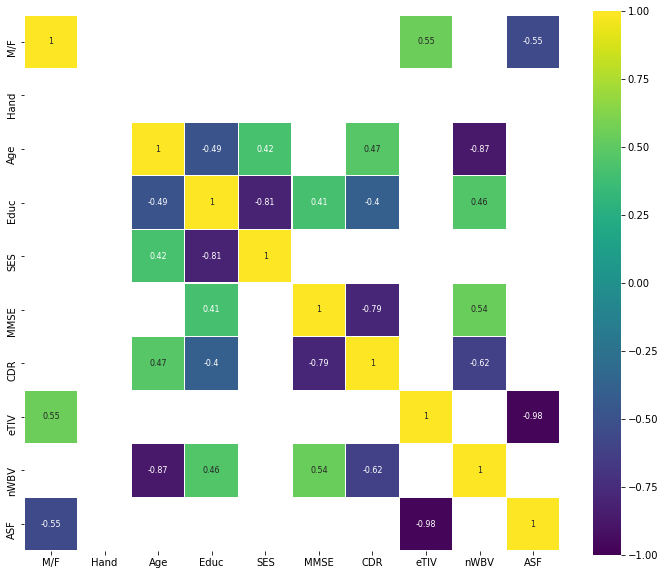

In [153]:
# Correlation heatmap
corr = train_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.4) | (corr <= -0.4)],
cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
annot=True, annot_kws={"size": 8}, square=True)

In [154]:
train_data1 = train_data.copy()
train_data1 = train_data1.drop(columns=['Hand', 'M/F', 'SES', 'eTIV', 'ASF'])
train_data1.shape

(436, 5)

# Model Training

In [155]:
# Standardize data
from sklearn.preprocessing import StandardScaler
# Columns not to be standardized. These are columns with categorical data,
# also we don't standardize our target vraiable
cols = ['SES', 'Educ']
# Pick remaining columns and standardize them
columns = [c for c in train_data.columns if c not in cols]
scaler = StandardScaler()
scaler.fit(train_data[columns])
train_data[columns] = scaler.transform(train_data[columns])


In [156]:
# Train Test Split
from sklearn.model_selection import train_test_split
y = train_data['CDR']
X = train_data.drop(columns=['CDR'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)


Training Set Dimensions: (348, 9)
Validation Set Dimensions: (88, 9)


In [157]:
# Train Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
randomf = RandomForestRegressor(n_estimators=200)
randomf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [158]:
# Measure mean absolute error for training and validation sets
print('Mean Absolute Error for Training Set:', mean_absolute_error(y_train, randomf.predict(X_train)))
print('Mean Absolute Error for Test Set:', mean_absolute_error(y_test, randomf.predict(X_test)))


Mean Absolute Error for Training Set: 0.12844211947130293
Mean Absolute Error for Test Set: 0.3033005504298397


feature: M/F = 0.009271865022427042
feature: Hand = 0.0
feature: Age = 0.08089161564685167
feature: Educ = 0.019102329758786236
feature: SES = 0.03338782971983988
feature: MMSE = 0.6202658574005908
feature: eTIV = 0.03573334666672761
feature: nWBV = 0.15820862877657849
feature: ASF = 0.04313852700819822


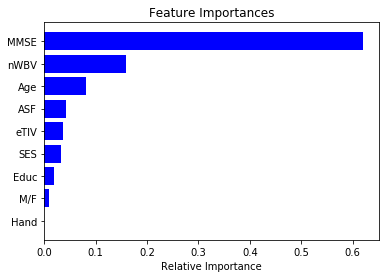

In [160]:
# important features for random forest regressor
for name, importance in zip(X.columns, randomf.feature_importances_):
    print('feature:', name, "=", importance)
importances = randomf.feature_importances_
indices = np.argsort(importances)
features = X.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


# Testing

In [161]:
# parameter grid for fine-tuning random forest regressor
# you can take a look at scikit-learn official documentation
# where you'll find the parameters of random forest regressor
from sklearn.model_selection import GridSearchCV
params = {'max_depth': [5, 10, 12], 
          'max_features': [2, 4, 6],
          'min_samples_leaf': [3, 4, 5],
          'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300]}
k = 5
score_param = 'neg_mean_absolute_error'
rf = RandomForestRegressor()
rf_grid = GridSearchCV(estimator=rf, param_grid=params, scoring=score_param, n_jobs=-1,
cv=k, verbose=True)
rf_grid.fit(X_train, y_train)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   54.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed:  5.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [162]:
from sklearn.metrics import mean_absolute_error
# get best model (trained on best set of params) from grid search cv
best_model = rf_grid.best_estimator_
# get best model predictions for training and validation sets
predict_train = best_model.predict(X_train)
predict_test = best_model.predict(X_test)
# print mean absolute error for predictions taken from the best model
print('Mean Absolute Error for Training Set:', mean_absolute_error(y_train, predict_train))
print('Mean Absolute Error for Validation Set:', mean_absolute_error(y_test, predict_test))

Mean Absolute Error for Training Set: 0.22196919121843553
Mean Absolute Error for Validation Set: 0.3120563508424424
